In [1]:
from keras.datasets import mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()


In [2]:
X_train.shape

(60000, 28, 28)

In [3]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_train.shape

(60000, 784)

In [4]:
X_test = X_test.reshape(X_test.shape[0], 784)
X_test.shape

(10000, 784)

In [5]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD

model = Sequential()
model.add(Flatten(input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=SGD(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

modelpath = "./model_optimization/mnist_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [9]:
history = model.fit(X_train, y_train, epochs=100, verbose=1, validation_split=0.2, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/100
1493/1500 [============================>.] - ETA: 0s - loss: 1.8012 - accuracy: 0.5020
Epoch 1: val_loss improved from inf to 1.36022, saving model to ./model_optimization\mnist_MLP.hdf5
1500/1500 [==============================] - 1s 763us/step - loss: 1.7993 - accuracy: 0.5030 - val_loss: 1.3602 - val_accuracy: 0.7429
Epoch 2/100
1460/1500 [============================>.] - ETA: 0s - loss: 1.1814 - accuracy: 0.7652
Epoch 2: val_loss improved from 1.36022 to 0.98980, saving model to ./model_optimization\mnist_MLP.hdf5
1500/1500 [==============================] - 1s 688us/step - loss: 1.1777 - accuracy: 0.7656 - val_loss: 0.9898 - val_accuracy: 0.8083
Epoch 3/100
1489/1500 [============================>.] - ETA: 0s - loss: 0.9313 - accuracy: 0.8078
Epoch 3: val_loss improved from 0.98980 to 0.81707, saving model to ./model_optimization\mnist_MLP.hdf5
1500/1500 [==============================] - 1s 720us/step - loss: 0.9308 - accuracy: 0.8078 - val_loss: 0.8171 - val_accurac

In [10]:
score = model.evaluate(X_test, y_test)
print(f"accuracy : {round(score[1],2)}")

313/313 [==============================] - 0s 571us/step - loss: 0.3146 - accuracy: 0.9124
accuracy : 0.91


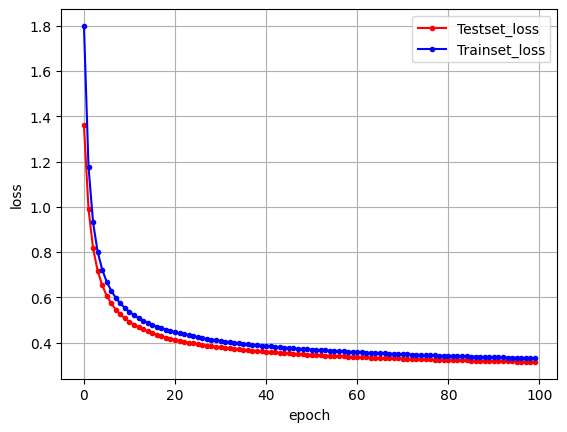

In [11]:
import numpy as np
import matplotlib.pyplot as plt

y_val_loss = history.history["val_loss"]
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_val_loss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()